In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
import os

In [2]:
pca2 = pd.read_csv("iris.csv")
pca2.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [4]:
pca2['Species']=le.fit_transform(pca2['Species'])

In [5]:
pca2 = pd.DataFrame(pca2)

In [6]:
pca2.shape

(150, 5)

In [7]:
pca2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [8]:
#pca2 = pca3.drop(['Unnamed: 0'],1)
pca2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [9]:
pca2.Species.value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32>

In [10]:
# sd 
pca2.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
#convert it to numpy arrays
X=pca2.values

In [12]:
#Scaling the values
X


array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [13]:
X = scale(X)
pca2 = PCA(n_components=5)
pca2.fit(X)

PCA(n_components=5)

In [14]:
#The amount of variance that each PC explains
var= pca2.explained_variance_ratio_
var

array([0.76740358, 0.18282727, 0.03724523, 0.00841722, 0.0041067 ])

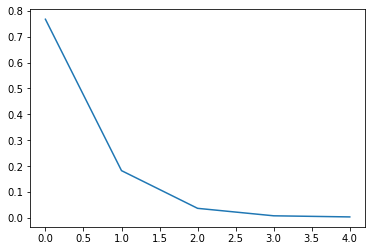

In [20]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca2.explained_variance_ratio_, decimals=4)*100)
var1
plt.plot(var) # cumulative
###   plt.plot(var) ******

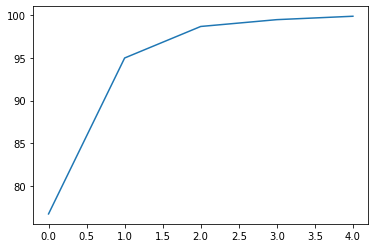

In [22]:
var1=np.cumsum(np.round(pca2.explained_variance_ratio_, decimals=3)*100)
var1
plt.plot(var1) # cumulative
#### plt.plot(var1) correct method 1/ 1/ 1/

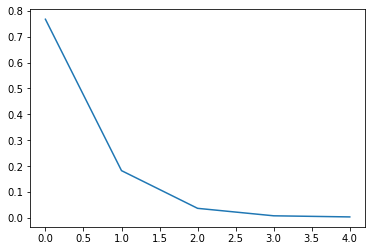

In [16]:
plt.plot(var) # cumulative

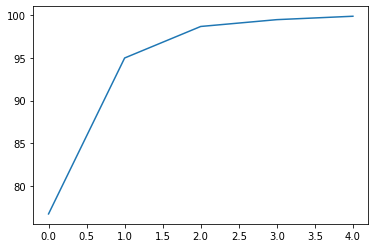

In [23]:
plt.plot(var1) # cumulative correct method

In [17]:
#_________Eigen vector
pca2_egvct = pca2.components_ #Eigen vectors


In [18]:
pca2_egvl = pca2.explained_variance_ #Eigen Values

In [19]:
#Looking at above plot I'm taking 2 variables
pca = PCA(n_components=5)
pca.fit(X)
X1=pca.fit_transform(X)
print(X1) # 10by2 data

[[-2.57612023e+00  4.74499270e-01 -5.43641514e-02 -1.03224070e-01
   3.22738312e-02]
 [-2.41532249e+00 -6.78091967e-01 -2.03080307e-01 -6.49621180e-02
   1.07023054e-01]
 [-2.65933256e+00 -3.48281935e-01  1.12681278e-01 -4.61763490e-02
   3.25552498e-02]
 [-2.60199054e+00 -6.03305942e-01  1.34287750e-01 -6.28947987e-04
  -6.60724320e-02]
 [-2.68374418e+00  6.40220395e-01  1.02711326e-01 -8.69237899e-02
  -2.84500872e-02]
 [-2.41219305e+00  1.48486231e+00  3.39188384e-02  4.49292771e-02
   1.98590342e-03]
 [-2.72650791e+00  4.03743320e-02  3.85007100e-01  6.37655541e-02
  -4.08381153e-02]
 [-2.54754039e+00  2.17843045e-01 -3.11470499e-02 -7.14914589e-02
  -1.93738176e-02]
 [-2.63111739e+00 -1.12151504e+00  1.85553843e-01  2.13919023e-02
  -2.84276305e-02]
 [-2.50568834e+00 -4.73753105e-01 -1.89304165e-01 -1.32591701e-01
  -3.03238684e-02]
 [-2.49309024e+00  1.03899203e+00 -1.96581850e-01 -1.42353970e-01
   2.73247968e-02]
 [-2.62658449e+00  1.26907945e-01  1.49145529e-01 -2.34585685e-02